# PANEL 4 - M6A MOTIFs



## Load libraries

In [2]:
# IMPORT LIBRARIES
import pandas as pd
from Bio import SeqIO
import glob
import pandas as pd
import pysam
import seaborn as sns
import matplotlib.pylab as plt
import pyranges as pr
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy as np

colors_input = {
  "RNA002_HEK293T_A" :  "#EE6C4D",
  "RNA002_HEK293T_B" :  "#E69581",

  "RNA002_blood_1" :"#0B3954",
  "RNA002_blood_IVT_1" :"#8b5cf6",
  "RNA002_UHRR_1" : "#098C9A",
  "RNA004_HEK293T_A" : "#EE6C4D",
  "RNA004_HEK293T_B" : "#E69581",

  "RNA004_blood_1" :"#0B3954",
  "RNA004_blood_IVT_1" :"#8b5cf6",
  "RNA004_UHRR_1" : "#098C9A",
  "RNA004_UHRR_2" : "#26AFBE",
  "RNA004_UHRR_3" : "#93C6CC", 
  "RNA004_blood_2" : "#177BB5",
  "RNA004_blood_3" : "#38A6E5",
  "RNA004_blood_IVT_3" : "#BA9EFA",
  "RNA004_blood_IVT_3_R2" : "#E3D8FD",
  "RNA002_blood_1_rodan" : "#098C9A",
  "RNA002_blood_1_m6ABasecaller" : "#098C9A",
  "mAFiA" : "#098C9A",
  "m6ABasecaller" : "#ee6c4d",
  "Dorado" : "#0B3954"
}
colors_input2 = {
  "HEK293T" :  "#EE6C4D",
  "blood" :"#115277",
  "blood_IVT" :"#8b5cf6",
  "UHRR" : "#098C9A"
}

# Extract Kmer Context for m6A

In [3]:
# SET GENOME LOCATION
hg38="/home/awiercze/GRCh38.primary_assembly.genome.fa"

# LOAD GENOME USING SEQIO
genome = SeqIO.to_dict(SeqIO.parse(hg38, "fasta"))

# FUNCTION TO EXTRACT SEQUENCE CONTEXT AROUND MODIFICATION
def get_sequence(chrom, start, end, strand):
    # Get the sequence from the reference genome
    seq = genome[chrom].seq[start:end]
    
    # If the strand is negative, take the reverse complement
    if strand == '-':
        return "".join(list(seq.reverse_complement()))
    return "".join(list(seq))

def extract_kmers(genome, bed_file, output_file):
    # Load the BED file into a pandas DataFrame
    columns = ['chrom', 'start', 'end', 'mod_code', 'score', 'strand', "mod_start", "mod_end", "color", "n_valid_cov", "frac_mod", "n_mod", "n_canonical", "n_other_mod", "n_delete", "n_fail", "n_diff", "n_nocall"]
    df_unfilt = pd.read_csv(bed_file, sep='\t', header=None, names = columns)
    df = df_unfilt[(df_unfilt['n_valid_cov'] >= 10) & (df_unfilt['frac_mod'] >= 10)]
    df['start'] = df['start'] - 2
    df['end'] = df['end'] + 2

    # Ensure start doesn't go below 0 (which would be invalid in genome coordinates)
    df['start'] = df['start'].apply(lambda x: max(0, x))
    
    # Extract the sequence context for each row in the BED file
    df['sequence_context'] = df.apply(lambda row: get_sequence(row['chrom'], row['start'], row['end'], row['strand']), axis=1)
    print(f"Sequence context extracted and saved in {output_file}")
    #print(df.head(n = 3))
    df.to_csv(output_file, sep='\t', header=True, index=False)
    return(df)


## RNA004 - m6A

In [ ]:
bed_files_m6A = glob.glob("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/m6A_pseu_refilter_rev1_nar1/*m6A*")

for i in bed_files_m6A:
    print(i)
    x = i.split("/")[-1]
    out_name = x.replace(".bed", ".motif.bed")
    extract_kmers(genome, i, "/home/awiercze/DRACH_motif_analysis/" + out_name)

In [72]:
i = "/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/S6_IVT_analysis/merged_RNA004_S6_IVT_m6A.r1.mod.bed"
x = i.split("/")[-1]
out_name = x.replace(".bed", ".motif.bed")
extract_kmers(genome, i, "/home/awiercze/DRACH_motif_analysis/" + out_name)

Sequence context extracted and saved in /home/awiercze/DRACH_motif_analysis/merged_RNA004_S6_IVT_m6A.r1.mod.motif.bed


/tmp/ipykernel_788040/675039772.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['start'] - 2
/tmp/ipykernel_788040/675039772.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end'] = df['end'] + 2
/tmp/ipykernel_788040/675039772.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,chrom,start,end,mod_code,score,strand,mod_start,mod_end,color,n_valid_cov,frac_mod,n_mod,n_canonical,n_other_mod,n_delete,n_fail,n_diff,n_nocall,sequence_context
995,chr1,630348,630353,a,10,+,630350,630351,"255,0,0",10,10.00,1,9,0,0,3,0,0,TAACA
7624,chr1,8356140,8356145,a,15,-,8356142,8356143,"255,0,0",15,13.33,2,13,0,2,2,0,0,GGACA
13270,chr1,12209040,12209045,a,1143,+,12209042,12209043,"255,0,0",1143,14.96,171,972,0,11,765,18,0,GGACA
34235,chr1,28146632,28146637,a,10,-,28146634,28146635,"255,0,0",10,10.00,1,9,0,0,4,0,0,TGACA
35527,chr1,28719294,28719299,a,10,+,28719296,28719297,"255,0,0",10,10.00,1,9,0,0,0,0,0,AAACA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012974,chrX,53683983,53683988,a,21,-,53683985,53683986,"255,0,0",21,14.29,3,18,0,0,14,0,0,TGACT
2016608,chrX,65731106,65731111,a,10,-,65731108,65731109,"255,0,0",10,10.00,1,9,0,0,0,0,0,GGACT
2024021,chrX,75274361,75274366,a,11,+,75274363,75274364,"255,0,0",11,18.18,2,9,0,0,0,0,0,GGACC
2027305,chrX,81298360,81298365,a,10,-,81298362,81298363,"255,0,0",10,20.00,2,8,0,0,0,0,0,AAACT


In [158]:
subsampled_blood_m6A = glob.glob("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/R2Q2/cov_sub_*_m6A.cov_sub_r1.mod.bed")
for i in subsampled_blood_m6A:
    print(i)
    x = i.split("/")[-1]
    out_name = x.replace(".bed", ".motif.bed")
    extract_kmers(genome, i, "/home/awiercze/DRACH_motif_analysis/" + out_name)

/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/R2Q2/cov_sub_RNA004_S6_DRS_basecall.0.7.2.GRCh38_m6A.cov_sub_r1.mod.bed


/tmp/ipykernel_68382/3130620718.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['start'] - 2
/tmp/ipykernel_68382/3130620718.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end'] = df['end'] + 2
/tmp/ipykernel_68382/3130620718.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Sequence context extracted and saved in /home/awiercze/DRACH_motif_analysis/cov_sub_RNA004_S6_DRS_basecall.0.7.2.GRCh38_m6A.cov_sub_r1.mod.motif.bed
/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/R2Q2/cov_sub_RNA004_blood.0.7.2.GRCh38_m6A.cov_sub_r1.mod.bed


/tmp/ipykernel_68382/3130620718.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['start'] - 2
/tmp/ipykernel_68382/3130620718.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end'] = df['end'] + 2
/tmp/ipykernel_68382/3130620718.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Sequence context extracted and saved in /home/awiercze/DRACH_motif_analysis/cov_sub_RNA004_blood.0.7.2.GRCh38_m6A.cov_sub_r1.mod.motif.bed
/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/R2Q2/cov_sub_RNA004_S5_DRS_basecall.0.7.2.GRCh38_m6A.cov_sub_r1.mod.bed


/tmp/ipykernel_68382/3130620718.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['start'] - 2
/tmp/ipykernel_68382/3130620718.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end'] = df['end'] + 2
/tmp/ipykernel_68382/3130620718.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Sequence context extracted and saved in /home/awiercze/DRACH_motif_analysis/cov_sub_RNA004_S5_DRS_basecall.0.7.2.GRCh38_m6A.cov_sub_r1.mod.motif.bed


/tmp/ipykernel_68382/3130620718.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sequence_context'] = df.apply(lambda row: get_sequence(row['chrom'], row['start'], row['end'], row['strand']), axis=1)


In [159]:
glob.glob("/home/awiercze/DRACH_motif_analysis/*m6A.r1.mod.motif.bed")

['/home/awiercze/DRACH_motif_analysis/RNA004_UHRR_3.0.7.2.GRCh38_m6A.r1.mod.motif.bed',
 '/home/awiercze/DRACH_motif_analysis/merged_RNA004_S6_IVT_m6A.r1.mod.motif.bed',
 '/home/awiercze/DRACH_motif_analysis/RNA004_blood_IVT.0.7.2.GRCh38_m6A.r1.mod.motif.bed',
 '/home/awiercze/DRACH_motif_analysis/RNA004_S6_IVT_LI_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed',
 '/home/awiercze/DRACH_motif_analysis/RNA004_B_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed',
 '/home/awiercze/DRACH_motif_analysis/RNA004_blood.0.7.2.GRCh38_m6A.r1.mod.motif.bed',
 '/home/awiercze/DRACH_motif_analysis/RNA004_A_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed',
 '/home/awiercze/DRACH_motif_analysis/RNA004_UHRR_1_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed',
 '/home/awiercze/DRACH_motif_analysis/RNA004_S6_DRS_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed',
 '/home/awiercze/DRACH_motif_analysis/RNA004_UHRR_2_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed',
 '/home/awiercze/DRACH_motif_analysis/RNA004_S5_DRS_basecall.0.7.2.GRCh38_m6A

# m6A motif plots

In [4]:
RNA004_m6A = glob.glob("/home/awiercze/DRACH_motif_analysis/*m6A.r1.mod.motif.bed")
p_out = pd.DataFrame()
for i in RNA004_m6A:
    print(i)
    p = pd.read_csv(i, sep = "\t", header = 0)
    p["sample"] = i.split("/")[-1].replace(".0.7.2.GRCh38_m6A.r1.mod.motif.bed", "").replace("_basecall", "")
    p["Chemistry"] = "RNA004"
    p["caller"] = "Dorado"
    p_out = pd.concat([p_out, p], ignore_index=True)
    p_out = p_out[p_out["chrom"].str.contains("chr")]
    
replace_dict = {
    "_A": "_HEK293T_A","_B": "_HEK293T_B",
    "S5_DRS": "blood_2",
    "RNA004_blood_IVT": "RNA004_blood_IVT_1",
    "RNA004_blood$": "RNA004_blood_1",
    "merged_RNA004_S6_IVT_m6A.r1.mod.motif.bed" : "RNA004_blood_IVT_3",
    "S6_IVT_LI": "blood_IVT_3_R2",
    "S6_IVT": "blood_IVT_3_R1",
    "S6_DRS": "blood_3"
}
p_out["dataset"] = p_out["sample"].replace(replace_dict, regex=True)
p_out["ID"] = p_out["dataset"].str.replace("RNA00[2|4]_", "", regex = True)
p_out["SampleType"] = p_out["ID"].str.replace("_[A|B|1|2|3].*$", "", regex = True)
p_out["Chemistry"] = p_out["dataset"].str.replace("_.*$", "", regex = True)
p_out = p_out[~p_out["dataset"].isin(["RNA004_blood_IVT_3_R1", "RNA004_blood_IVT_3_R2"])]
p_out.to_csv("~/NEW_RNA004_PLOTS/TABLES/PAPER_MOTIFS_RAW.tsv", sep = "\t", index = False)

/home/awiercze/DRACH_motif_analysis/RNA004_UHRR_3.0.7.2.GRCh38_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_motif_analysis/merged_RNA004_S6_IVT_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_motif_analysis/RNA004_blood_IVT.0.7.2.GRCh38_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_motif_analysis/RNA004_S6_IVT_LI_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_motif_analysis/RNA004_B_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_motif_analysis/RNA004_blood.0.7.2.GRCh38_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_motif_analysis/RNA004_A_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_motif_analysis/RNA004_UHRR_1_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_motif_analysis/RNA004_S6_DRS_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_motif_analysis/RNA004_UHRR_2_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_motif_analysis/RNA004_S5_DRS_basecall.0.7.2.GRCh38_m6A.r1.mod.motif.bed
/home/awiercze/DRACH_mot

In [5]:
# Subsampled sample 
subsample_file = "/home/awiercze/DRACH_motif_analysis/cov_sub_RNA004_blood.0.7.2.GRCh38_m6A.cov_sub_r1.mod.motif.bed"
p_out_subsample = pd.read_csv(subsample_file, sep = "\t", header = 0)
p_out_subsample["sample"] = subsample_file.split("/")[-1].replace(".0.7.2.GRCh38_m6A.cov_sub_r1.mod.motif.bed", "_1_subsample").replace("cov_sub_", "")
p_out_subsample["Chemistry"] = "RNA004"
p_out_subsample["caller"] = "Dorado"
p_out_subsample = p_out_subsample[p_out_subsample["chrom"] == "chr20"]
p_out_subsample = p_out_subsample[p_out_subsample["n_valid_cov"] >= 10]
p_out_subsample = p_out_subsample[p_out_subsample["frac_mod"] >= 10]

In [6]:
p_out_subsample["sequence_context"].nunique()

18

/tmp/ipykernel_1023285/2821170341.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])


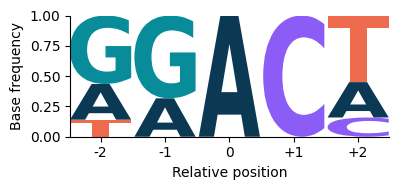

In [7]:
from logomaker import Logo
from logomaker import alignment_to_matrix

sequences = p_out["sequence_context"].to_list()

# Create a counts matrix from the aligned sequences
count_matrix = alignment_to_matrix(sequences, to_type='counts')

# Normalize to get frequencies
freq_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0)
custom_color_dict = {
    'A': '#0B3954',  # Blue
    'C': '#8b5cf6',  # Orange
    'G': '#098C9A',  # Green
    'T': '#EE6C4D'   # Red
}

# Plot
fig, ax = plt.subplots(figsize=(4, 2))
Logo(freq_matrix, ax=ax, color_scheme=custom_color_dict)
ax.set_xlabel("Relative position")
ax.set_ylabel("Base frequency")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])
plt.tight_layout()

fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/PAPER_M6A_MOTIF_HOMER_PLOT.pdf", dpi = 300, transparent = True)
plt.show()

In [40]:
p_out

,chrom,start,end,mod_code,score,strand,mod_start,mod_end,color,n_valid_cov,...,n_fail,n_diff,n_nocall,sequence_context,sample,Chemistry,caller,dataset,ID,SampleType
0,chr1,14412,14417,a,142,-,14414,14415,"255,0,0",142,...,31,0,0,GAACT,RNA004_UHRR_3,RNA004,Dorado,RNA004_UHRR_3,UHRR_3,UHRR
1,chr1,14514,14519,a,153,-,14516,14517,"255,0,0",153,...,20,2,0,GGACT,RNA004_UHRR_3,RNA004,Dorado,RNA004_UHRR_3,UHRR_3,UHRR
2,chr1,14624,14629,a,145,-,14626,14627,"255,0,0",145,...,29,2,0,GGACA,RNA004_UHRR_3,RNA004,Dorado,RNA004_UHRR_3,UHRR_3,UHRR
3,chr1,14635,14640,a,146,-,14637,14638,"255,0,0",146,...,26,1,0,GGACA,RNA004_UHRR_3,RNA004,Dorado,RNA004_UHRR_3,UHRR_3,UHRR
4,chr1,15461,15466,a,26,-,15463,15464,"255,0,0",26,...,4,0,0,AGACT,RNA004_UHRR_3,RNA004,Dorado,RNA004_UHRR_3,UHRR_3,UHRR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191126,chrY,2489200,2489205,a,13,-,2489202,2489203,"255,0,0",13,...,0,0,0,GGACA,RNA004_S5_DRS,RNA004,Dorado,RNA004_blood_2,blood_2,blood
1191127,chrY,57128657,57128662,a,14,+,57128659,57128660,"255,0,0",14,...,2,0,0,GAACT,RNA004_S5_DRS,RNA004,Dorado,RNA004_blood_2,blood_2,blood
1191128,chrY,57211949,57211954,a,41,+,57211951,57211952,"255,0,0",41,...,5,0,0,GGACA,RNA004_S5_DRS,RNA004,Dorado,RNA004_blood_2,blood_2,blood
1191129,chrY,57212070,57212075,a,46,+,57212072,57212073,"255,0,0",46,...,6,0,0,GGACT,RNA004_S5_DRS,RNA004,Dorado,RNA004_blood_2,blood_2,blood


UHRR


/tmp/ipykernel_1023285/180007111.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])


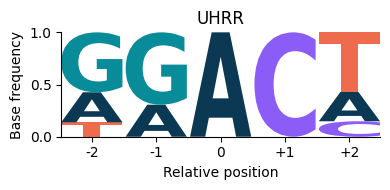

blood_IVT


/tmp/ipykernel_1023285/180007111.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])


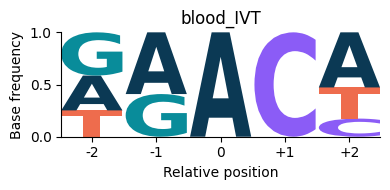

HEK293T


/tmp/ipykernel_1023285/180007111.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])


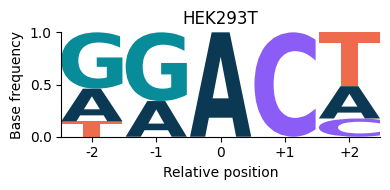

blood


/tmp/ipykernel_1023285/180007111.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])


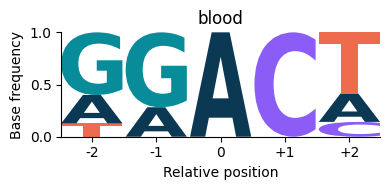

In [41]:
from logomaker import Logo
from logomaker import alignment_to_matrix

for i in p_out["SampleType"].unique():
    print(i)
    sequences = p_out.loc[p_out["SampleType"] == i, "sequence_context"].to_list()

    # Create a counts matrix from the aligned sequences
    count_matrix = alignment_to_matrix(sequences, to_type='counts')

    # Normalize to get frequencies
    freq_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    custom_color_dict = {
        'A': '#0B3954',  # Blue
        'C': '#8b5cf6',  # Orange
        'G': '#098C9A',  # Green
        'T': '#EE6C4D'   # Red
    }

    # Plot
    fig, ax = plt.subplots(figsize=(4, 2))
    Logo(freq_matrix, ax=ax, color_scheme=custom_color_dict)
    ax.set_xlabel("Relative position")
    ax.set_ylabel("Base frequency")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])
    plt.title(i)
    plt.tight_layout()

    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/PAPER_M6A_MOTIF_HOMER_PLOT_" + i + ".pdf", dpi = 300, transparent = True)
    plt.show()

#### LINE PLOT BLOOD

In [8]:
motif_perc = p_out[p_out["SampleType"] == "blood"].groupby("dataset").sequence_context.value_counts() / p_out[p_out["SampleType"] == "blood"].groupby("dataset").size() * 100
motif_perc = motif_perc.reset_index(name='percentage')
motif_order = list(motif_perc.groupby("sequence_context").percentage.mean().sort_values(ascending=False).index)

In [9]:
motif_perc_total = p_out.groupby("dataset").sequence_context.value_counts() / p_out.groupby("dataset").size() * 100
motif_perc_total = motif_perc_total.reset_index(name='percentage')



/tmp/ipykernel_1023285/2962200687.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


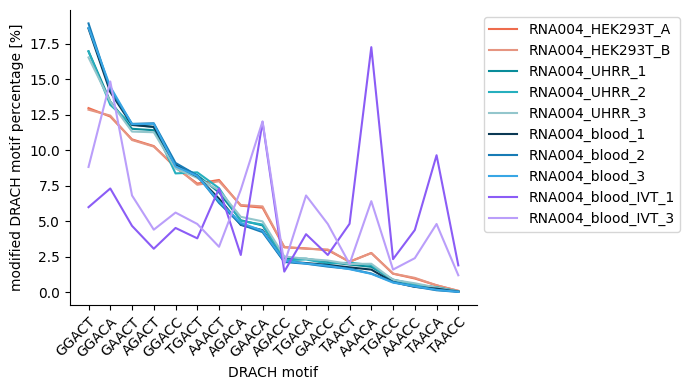

In [10]:
motif_perc_total = p_out.groupby("dataset").sequence_context.value_counts() / p_out.groupby("dataset").size() * 100
motif_perc_total = motif_perc_total.reset_index(name='percentage')


motif_perc_total = motif_perc_total.sort_values(by="percentage", ascending=False)

# Set sequence_context as an ordered categorical variable
motif_perc_total["sequence_context"] = pd.Categorical(
    motif_perc_total["sequence_context"],
    categories=motif_order,
    ordered=True
)

# Set sequence_context as an ordered categorical variable
motif_perc_total["dataset"] = pd.Categorical(
    motif_perc_total["dataset"],
    categories=motif_perc_total["dataset"].sort_values().drop_duplicates(),
    ordered=True
)

# Plot
fig = plt.figure(figsize=(7, 4))
ax = sns.lineplot(data=motif_perc_total, x="sequence_context", y="percentage", hue="dataset", palette = colors_input)

# Plot formatting
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("modified DRACH motif percentage [%]")
ax.set_xlabel("DRACH motif")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")
ax.legend(title="",fontsize=10, title_fontsize=10,bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_usage_all_samples.pdf", bbox_inches='tight', dpi=300)
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_usage_all_samples.png", bbox_inches='tight', dpi=300)


In [11]:
DRACH_motif_used_RNA004 = motif_perc_total

UHRR


/tmp/ipykernel_1023285/1483042375.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


blood_IVT


/tmp/ipykernel_1023285/1483042375.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


HEK293T


/tmp/ipykernel_1023285/1483042375.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


blood


/tmp/ipykernel_1023285/1483042375.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


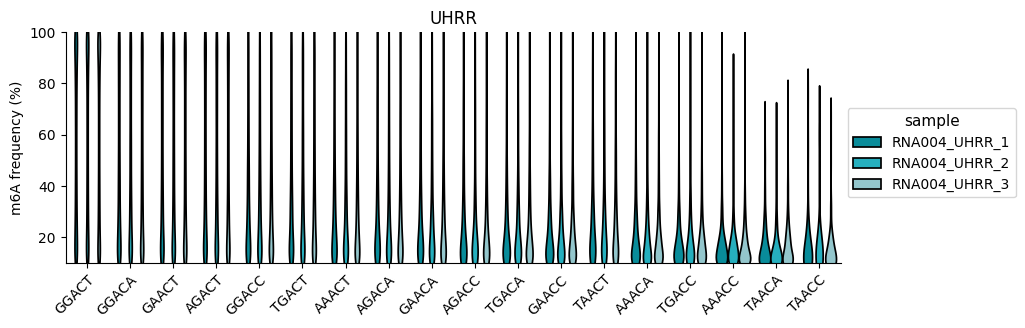

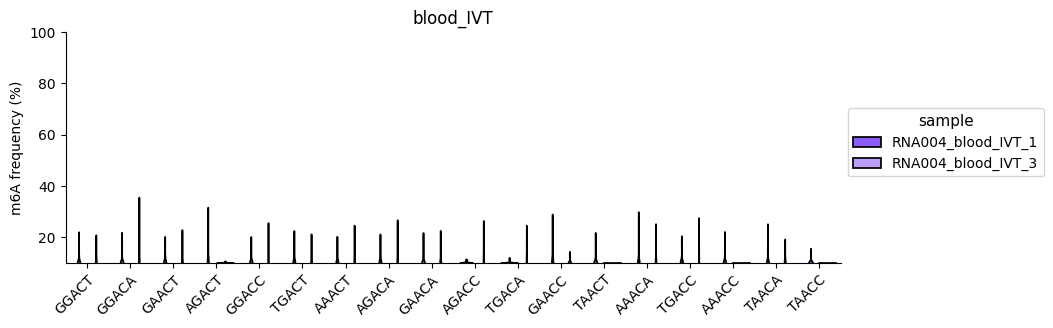

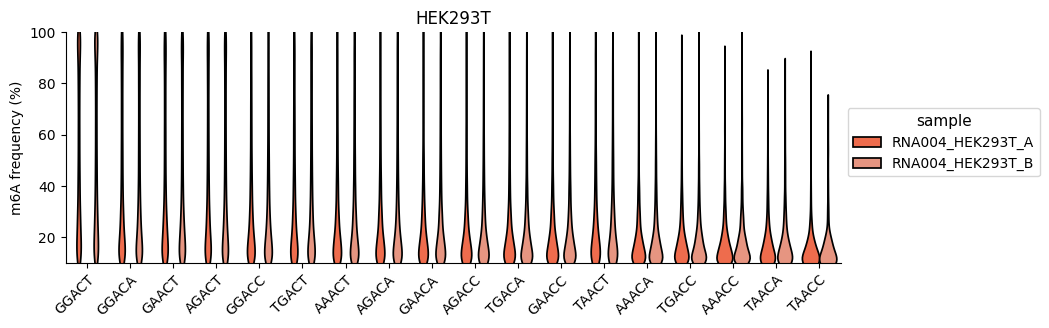

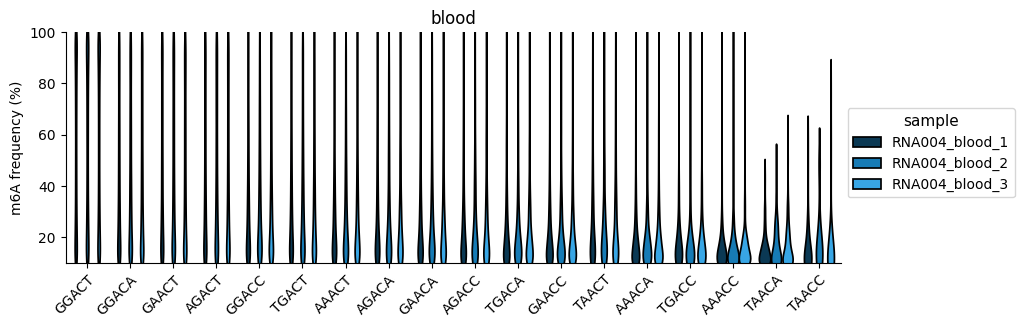

In [12]:
for i in p_out["SampleType"].unique():
    print(i)

    fig, ax = plt.subplots(figsize=(10, 3))
    pin = p_out[(p_out["SampleType"] == i) & (p_out["sequence_context"].isin(motif_order))]
    sns.violinplot(data = pin, order = motif_order, hue_order =sorted(pin.dataset.unique()),  x="sequence_context", linecolor ="black", y="frac_mod",saturation=1,palette=colors_input, inner=None, hue = "dataset")
    ax.spines['left'].set_color('black')   # Left axis line
    ax.spines['bottom'].set_color('black') 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_ylim(10 , 100)
    ax.set_title(i)

    ax.legend(title="sample",fontsize=10, title_fontsize=11,
                        bbox_to_anchor=(1, 0.7), loc='upper left')

    ax.set_ylabel("m6A frequency (%)")
    ax.set_xlabel("")
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6a_freq_" + i + "_RNA004.png", bbox_inches='tight', dpi=300)
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6a_freq_" + i + "_RNA004.pdf", bbox_inches='tight', dpi=300)

In [13]:
pin = p_out[(p_out["SampleType"] == "UHRR") & (p_out["sequence_context"].isin(motif_order))]

In [14]:
pin_mean = pin[["chrom",	"start",	"end", "sequence_context", "strand", "frac_mod"]].groupby(["chrom",	"start",	"end", "sequence_context", "strand"]).mean("frac_mod").reset_index()

UHRR


/tmp/ipykernel_1023285/3443673266.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


blood_IVT


/tmp/ipykernel_1023285/3443673266.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


HEK293T


/tmp/ipykernel_1023285/3443673266.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


blood


/tmp/ipykernel_1023285/3443673266.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


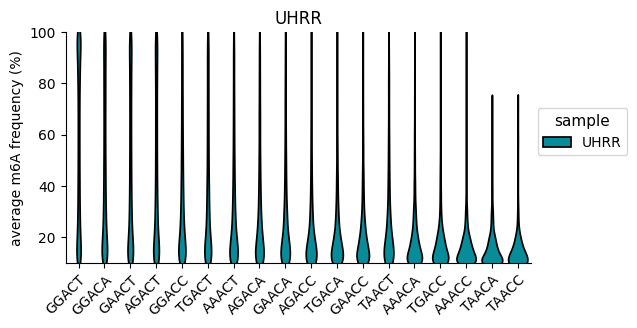

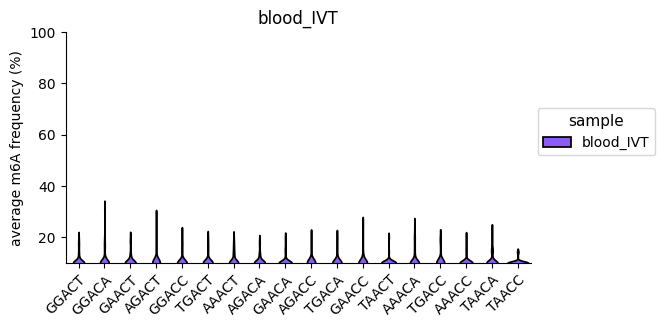

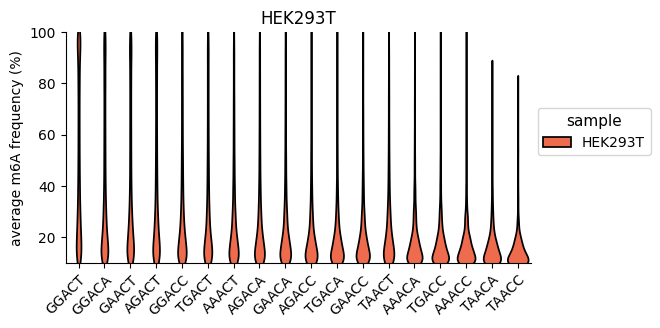

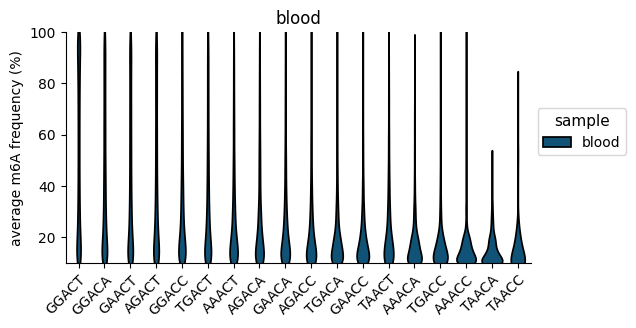

In [15]:
for i in p_out["SampleType"].unique():
    print(i)

    fig, ax = plt.subplots(figsize=(6, 3))
    pin = p_out[(p_out["SampleType"] == i) & (p_out["sequence_context"].isin(motif_order))]
    pin_mean = pin[["chrom",	"start",	"end", "sequence_context", "strand", "frac_mod"]].groupby(["chrom",	"start",	"end", "sequence_context", "strand"]).mean("frac_mod").reset_index()
    pin_mean["tissue"] = i
    sns.violinplot(data = pin_mean, hue = "tissue", palette = colors_input2, order = motif_order, x="sequence_context", linecolor ="black", y="frac_mod",saturation=1,inner=None)
    ax.spines['left'].set_color('black')   # Left axis line
    ax.spines['bottom'].set_color('black') 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_ylim(10 , 100)
    ax.set_title(i)

    ax.legend(title="sample",fontsize=10, title_fontsize=11,
                        bbox_to_anchor=(1, 0.7), loc='upper left')

    ax.set_ylabel("average m6A frequency (%)")
    ax.set_xlabel("")
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6a_freq_" + i + "_RNA004_mean.png", bbox_inches='tight', dpi=300)
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6a_freq_" + i + "_RNA004_mean.pdf", bbox_inches='tight', dpi=300)

UHRR


/tmp/ipykernel_1023285/2522232044.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


blood_IVT


/tmp/ipykernel_1023285/2522232044.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


HEK293T


/tmp/ipykernel_1023285/2522232044.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


blood


/tmp/ipykernel_1023285/2522232044.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


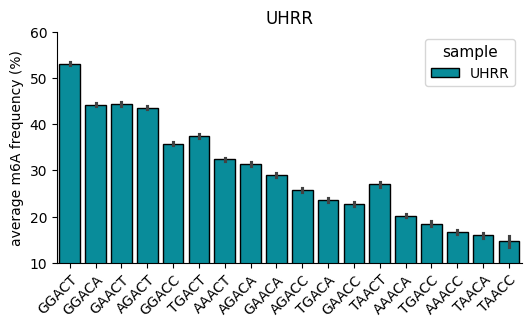

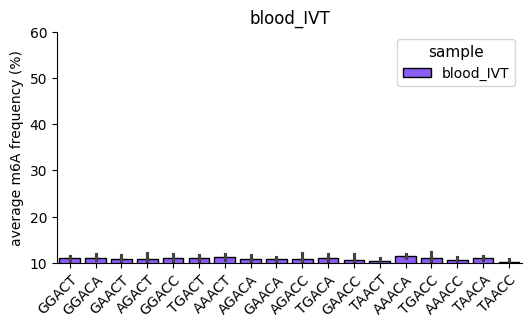

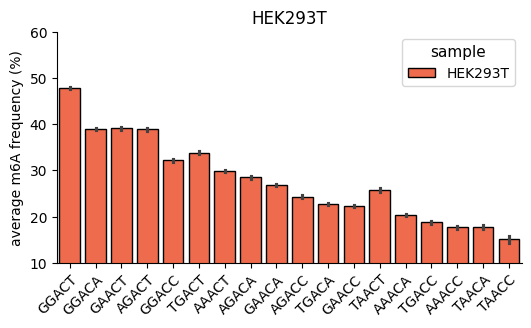

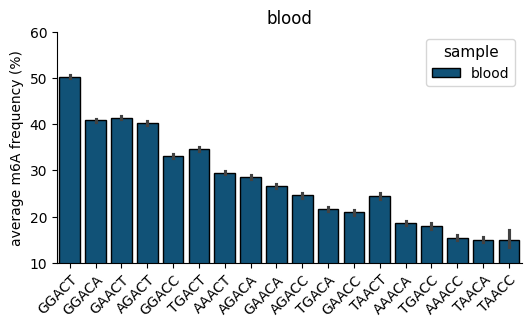

In [16]:
new_df = pd.DataFrame({"sequence_context" : motif_order})
for i in p_out["SampleType"].unique():
    print(i)

    fig, ax = plt.subplots(figsize=(6, 3))
    pin = p_out[(p_out["SampleType"] == i) & (p_out["sequence_context"].isin(motif_order))]
    pin_mean = pin[["chrom",	"start",	"end", "sequence_context", "strand", "frac_mod"]].groupby(["chrom",	"start",	"end", "sequence_context", "strand"]).mean("frac_mod").reset_index()
    pin_mean["tissue"] = i
    sns.barplot(data = pin_mean, hue = "tissue", palette = colors_input2, order = motif_order, x="sequence_context", edgecolor ="black", y="frac_mod",saturation=1)
    ax.spines['left'].set_color('black')   # Left axis line
    ax.spines['bottom'].set_color('black') 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_ylim(10 , 60)
    ax.set_title(i)

    ax.legend(title="sample",fontsize=10, title_fontsize=11, loc='upper right')

    ax.set_ylabel("average m6A frequency (%)")
    ax.set_xlabel("")
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6a_freq_" + i + "_RNA004_tissue_mean_per_position_bar.png", bbox_inches='tight', dpi=300)
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6a_freq_" + i + "_RNA004_tissue_mean_per_position_bar.pdf", bbox_inches='tight', dpi=300)
    
    mean_per_tissue = pin_mean.groupby("sequence_context").frac_mod.mean().reset_index(name = i)
    new_df = pd.merge(new_df, mean_per_tissue, on = "sequence_context", how = "left")
new_df.to_csv("~/NEW_RNA004_PLOTS/TABLES/PAPER_TABLE_MOTIF_MEAN_FREQ_TISSUE.tsv", sep = "\t", index = False)

### RATIO OF AVERAGE METHYLATION FREQ PER MOTIF BETWEEN BLOOD AND IVT

In [17]:
p_out_mean_per_sample = p_out.groupby(["sample", "dataset", "ID", "SampleType", "sequence_context"]).agg({'frac_mod' : [np.mean, np.median]}).reset_index()

p_out_mean_per_sample = (
    p_out.groupby(["sample", "dataset", "ID", "SampleType", "sequence_context"])
         .agg(n_m6A=("frac_mod", "count"), frac_mod_mean=("frac_mod", "mean"), frac_mod_median=("frac_mod", "median"))
         .reset_index()
)

motif_perc_total = p_out.groupby("dataset").sequence_context.value_counts() / p_out.groupby("dataset").size() * 100
motif_perc_total = motif_perc_total.reset_index(name='percentage')

DRACH_RNA004_out = pd.merge(motif_perc_total, p_out_mean_per_sample, on = ["dataset", "sequence_context"], how = "outer")


count_pivot = DRACH_RNA004_out.pivot(index="sequence_context", columns="dataset", values="n_m6A")
perc_used = DRACH_RNA004_out.pivot(index="sequence_context", columns="dataset", values="percentage")
mean_pivot = DRACH_RNA004_out.pivot(index="sequence_context", columns="dataset", values="frac_mod_mean")
median_pivot = DRACH_RNA004_out.pivot(index="sequence_context", columns="dataset", values="frac_mod_median")

# Step 3: Rename columns for clarity
mean_pivot.columns = [f"frac_mod_mean.{col}" for col in mean_pivot.columns]
median_pivot.columns = [f"frac_mod_median.{col}" for col in median_pivot.columns]
count_pivot.columns = [f"n_m6A.{col}" for col in count_pivot.columns]
perc_used.columns = [f"DRACH_motif_used.{col}" for col in perc_used.columns]

# Step 4: Merge all three pivot tables
pivot_full = (
    count_pivot
    .join(perc_used, how="outer")
    .join(mean_pivot, how="outer")
    .join(median_pivot, how="outer")
    .reset_index()
)
pivot_full = pivot_full.rename(columns = {"sequence_context": "DRACH_motif"})

In [18]:
pivot_full.to_csv("/home/awiercze/NEW_RNA004_PLOTS/TABLES/RNA004_DRACH_MOTIFS.tsv", sep ="\t", index = False)

/tmp/ipykernel_68382/3969740414.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


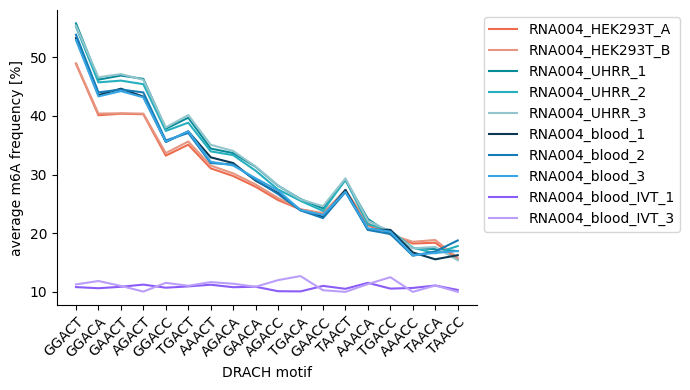

In [19]:
p_out_mean_per_sample = p_out_mean_per_sample.sort_values(by="frac_mod_mean", ascending=False)

# Set sequence_context as an ordered categorical variable
p_out_mean_per_sample["sequence_context"] = pd.Categorical(
    p_out_mean_per_sample["sequence_context"],
    categories=motif_order,
    ordered=True
)

# Set sequence_context as an ordered categorical variable
p_out_mean_per_sample["dataset"] = pd.Categorical(
    p_out_mean_per_sample["dataset"],
    categories=p_out_mean_per_sample["dataset"].sort_values().drop_duplicates(),
    ordered=True
)

# Plot
fig = plt.figure(figsize=(7, 4))
ax = sns.lineplot(data=p_out_mean_per_sample, x="sequence_context", y="frac_mod_mean", hue="dataset", palette = colors_input)

# Plot formatting
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("average m6A frequency [%]")
ax.set_xlabel("DRACH motif")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")
ax.legend(title="",fontsize=10, title_fontsize=10,bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6A_freq_all_samples.pdf", bbox_inches='tight', dpi=300)
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6A_freq_all_samples.png", bbox_inches='tight', dpi=300)


In [20]:
blood = p_out[(p_out["SampleType"] =="blood") ]
IVT = p_out[(p_out["ID"] =="blood_IVT_3") ]

In [21]:
blood["pos"] = blood["chrom"] + ":" + blood["start"].astype("str") + "-" + blood["end"].astype("str") + blood["strand"]

/tmp/ipykernel_68382/485498538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blood["pos"] = blood["chrom"] + ":" + blood["start"].astype("str") + "-" + blood["end"].astype("str") + blood["strand"]


In [22]:
blood["n_valid_cov"].min()

10

In [23]:
blood2 = blood[blood["sample"] == "RNA004_S5_DRS"]
blood3 = blood[blood["sample"] == "RNA004_S6_DRS"]
blood2_sub = blood2[blood2.pos.isin(blood3.pos)]
blood3_sub = blood3[blood3.pos.isin(blood2.pos)]
blood1_sub = blood3[blood3.pos.isin(blood2.pos)]

In [24]:
blood_joined = pd.concat([blood2_sub, blood3_sub], axis = 0)

In [25]:
blood_freq = blood.groupby(["ID", "sequence_context"]).frac_mod.mean().reset_index()
blood_IVT_freq = IVT.groupby(["sequence_context"]).frac_mod.mean().reset_index()
ratio_df = pd.merge(blood_IVT_freq, blood_freq, on = "sequence_context", suffixes = ("_IVT", "_blood")).sort_values(by = "frac_mod_blood", ascending=False)
ratio_df["ratio"] = ratio_df["frac_mod_IVT"] / ratio_df["frac_mod_blood"] * 100 
ratio_df["delta"] = ratio_df["frac_mod_blood"] - ratio_df["frac_mod_IVT"] 
ratio_df["delta2"] = 1 - (ratio_df["frac_mod_blood"] - ratio_df["frac_mod_IVT"]) / ratio_df["frac_mod_blood"]


In [26]:
blood_joined_freq = blood_joined.groupby(["ID", "sequence_context"]).frac_mod.mean().reset_index()
blood_IVT_freq = IVT.groupby(["sequence_context"]).frac_mod.mean().reset_index()
ratio_joined_df = pd.merge(blood_IVT_freq, blood_joined_freq, on = "sequence_context", suffixes = ("_IVT", "_blood")).sort_values(by = "frac_mod_blood", ascending=False)
ratio_joined_df["ratio"] = ratio_joined_df["frac_mod_IVT"] / ratio_joined_df["frac_mod_blood"] * 100 
ratio_joined_df["delta"] = ratio_joined_df["frac_mod_blood"] - ratio_joined_df["frac_mod_IVT"] 
ratio_joined_df["delta2"] = 1 - (ratio_joined_df["frac_mod_blood"] - ratio_joined_df["frac_mod_IVT"]) / ratio_joined_df["frac_mod_blood"]

In [27]:

norm = mcolors.Normalize(vmin=ratio_df["ratio"].min(), vmax=ratio_df["ratio"].max())

# Define purple colormap (light to dark)
cmap = sns.light_palette("#0B3954", as_cmap=True)

# Normalize ratio values across all data for consistent coloring
norm = Normalize(vmin=ratio_df["ratio"].min(), vmax=ratio_df["ratio"].max())

# Choose a colormap (purple shades)
#cmap = cm.get_cmap("Purples")  # or "plasma", "viridis", etc.

# Create color list: higher ratio → darker color
colors = [cmap(norm(val)) for val in ratio_df.set_index("sequence_context").loc[motif_order]["ratio"]]


/tmp/ipykernel_68382/2733610599.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


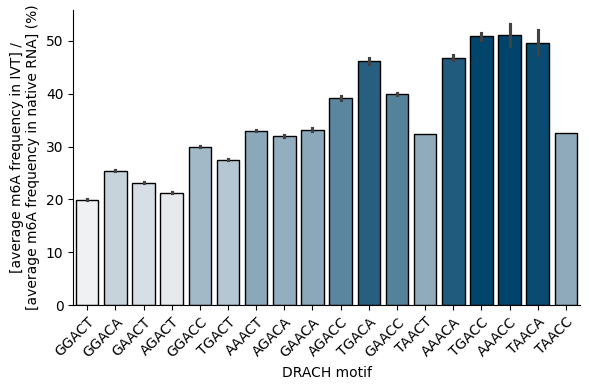

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, viridis

# Compute the mean ratio for each sequence context
means = ratio_joined_df.groupby("sequence_context")["ratio"].mean()

# Normalize the mean values to [0,1] for colormap
norm = Normalize(vmin=means.min(), vmax=means.max())

# Generate colors from colormap (e.g., viridis)
cmap = plt.cm.viridis
cmap = sns.light_palette("#00446B", as_cmap=True)
colors = {context: cmap(norm(mean)) for context, mean in means.items()}

# Plot
fig = plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=ratio_joined_df,
    x="sequence_context",
    y="ratio",
    order=motif_order,
    edgecolor="black",
    palette=colors,
    hue="sequence_context",
    saturation=1
)

# Plot formatting
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("[average m6A frequency in IVT] /\n[average m6A frequency in native RNA] (%)")
ax.set_xlabel("DRACH motif")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")
plt.tight_layout()

fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6a_freq_ratio_blood_IVT_RNA004_joined_sites.pdf", bbox_inches='tight', dpi=300)


#### BAR PLOT

/tmp/ipykernel_68382/3953704682.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
/tmp/ipykernel_68382/3953704682.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
/tmp/ipykernel_68382/3953704682.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
/tmp/ipykernel_68382/3953704682.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


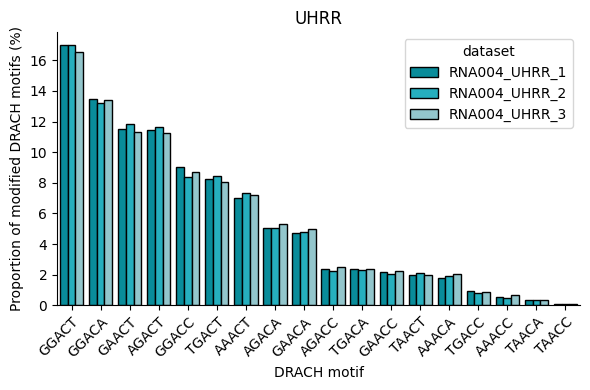

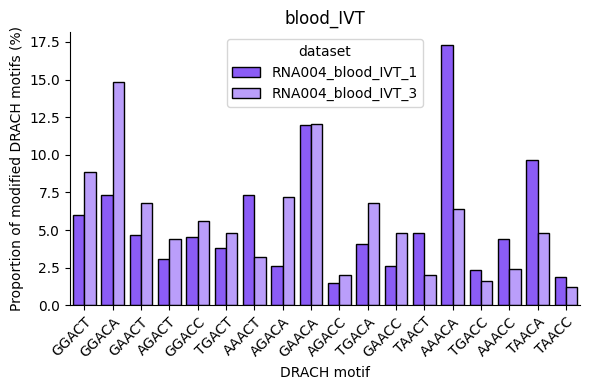

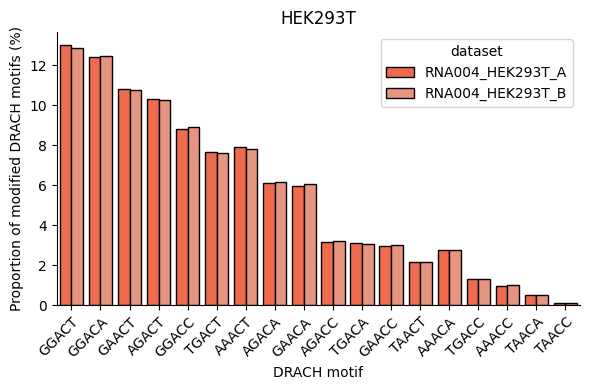

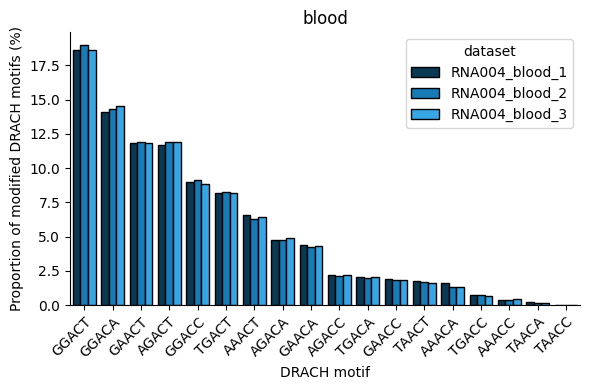

In [29]:
for i in p_out["SampleType"].unique():
    motif_perc = p_out[p_out["SampleType"] == i].groupby("dataset").sequence_context.value_counts() / p_out[p_out["SampleType"] == i].groupby("dataset").size() * 100
    motif_perc = motif_perc.reset_index(name='percentage')

    fig, ax = plt.subplots(figsize=(6, 4))

    sns.barplot(data = motif_perc, x="sequence_context", order = motif_order, hue_order= sorted(motif_perc["dataset"].unique()), y="percentage", edgecolor = "black", palette=colors_input, saturation=1,hue = "dataset")
    ax.spines['left'].set_color('black')   # Left axis line
    ax.spines['bottom'].set_color('black') 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
    ax.set_ylabel("Proportion of modified DRACH motifs (%)")
    ax.set_xlabel("DRACH motif")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(i)
    plt.tight_layout()
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_proportion_" + i + "_RNA004.png", bbox_inches='tight', dpi=300)
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_proportion_" + i + "_RNA004.pdf", bbox_inches='tight', dpi=300)


# RNA002 vs RNA004: DRACH motifs

### Generate DRACH motif tables

In [17]:
blood_RNA002 = glob.glob("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/CHR20_BAMS/RNA002_folder/m6A_*blood*.bed") + glob.glob("/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/CHR20_BAMS/final_blood*_rodan_chr20_mAFiA.sites.bed")

In [18]:
p_DRACH_motifs = pd.DataFrame()
for j in blood_RNA002:
    
    print(j)
    #print(t_tmp.columns)
    #t_tmp.columns = ["chrom", "start", "end", "mod_code", "score", "strand", "mod_start", "mod_end", "color", "n_valid_cov", "frac_mod", "n_mod", "n_canonical", "n_other_mod", "n_delete", "n_fail", "n_diff", "n_nocall"]
    if "rodan" in j:
        t_tmp = pd.read_csv(j, sep = "\t", header = 0)
        print(len(t_tmp))
        caller = "mAFiA"
    else:
        print(j)
        t_tmp = pd.read_csv(j, sep = "\t", header = None)
        print(len(t_tmp))

        t_tmp.columns = ["chrom", "chromStart", "chromEnd", "name", "score", "strand", "mod_start", "mod_end", "color", "coverage", "modRatio"]
        caller = "m6ABasecaller"

    t_tmp = t_tmp[["chrom", "chromStart", "chromEnd", "name", "score", "strand", "coverage", "modRatio"]]
    t_tmp["sample"] = j.split("/")[-1].replace(".bed", "")
    t_tmp["sample"] = t_tmp["sample"].replace("final_blood_002_rodan_chr20_mAFiA.sites", "RNA002_blood_1")
    t_tmp["sample"] = t_tmp["sample"].replace("final_blood_IVT_002_rodan_chr20_mAFiA.sites", "RNA002_blood_IVT_1")
    t_tmp["sample"] = t_tmp["sample"].replace("blood_IVT_002_rodan_chr20_mAFiA.sites", "RNA002_blood_IVT_1")

    t_tmp["sample"] = t_tmp["sample"].replace("blood_002_rodan_chr20_mAFiA.sites", "RNA002_blood_1")
    t_tmp["sample"] = t_tmp["sample"].replace("m6A_basecaller_blood_mod", "RNA002_blood_1")
    t_tmp["sample"] = t_tmp["sample"].replace("m6A_basecaller_lemke_blood_IVT_mod", "RNA002_blood_IVT_1")
    t_tmp["sample"] = t_tmp["sample"].replace("m6A_basecaller_lemke_b_mod", "RNA002_HEK293T_B")
    t_tmp["sample"] = t_tmp["sample"].replace("m6A_basecaller_lemke_a_mod", "RNA002_HEK293T_A")
    t_tmp["sample"] = t_tmp["sample"].replace("m6A_basecaller_lemke_uhrr_mod", "RNA002_UHRR_1")
    t_tmp["sample"] = t_tmp["sample"].replace("UHRR_002_rodan_chr20_mAFiA.sites", "RNA002_UHRR_1")
    t_tmp["sample"] = t_tmp["sample"].replace("A_002_rodan_chr20_mAFiA.sites", "RNA002_HEK293T_A")
    t_tmp["sample"] = t_tmp["sample"].replace("B_002_rodan_chr20_mAFiA.sites", "RNA002_HEK293T_B")

    t_tmp["caller"] = caller
    t_tmp["chemistry"] = "RNA002"
    
    t_tmp['chromStart'] = t_tmp['chromStart'] - 2
    t_tmp['chromEnd'] = t_tmp['chromEnd'] + 2

    # Ensure start doesn't go below 0 (which would be invalid in genome coordinates)
    t_tmp['chromStart'] = t_tmp['chromStart'].apply(lambda x: max(0, x))
    
    # Extract the sequence context for each row in the BED file
    t_tmp['sequence_context'] = t_tmp.apply(lambda row: get_sequence(row['chrom'], row['chromStart'], row['chromEnd'], row['strand']), axis=1)
    x = j.split("/")[-1]
    out_name = x.replace(".bed", ".motif.bed")
    output_file =  "/home/awiercze/DRACH_motif_analysis/" + out_name
    print(f"Sequence context extracted and saved in {output_file}")
    #print(df.head(n = 3))
    t_tmp.to_csv(output_file, sep='\t', header=True, index=False)
    
    
    p_DRACH_motifs = pd.concat([p_DRACH_motifs, t_tmp], axis = 0)

/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/CHR20_BAMS/RNA002_folder/m6A_basecaller_blood_mod.bed
/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/CHR20_BAMS/RNA002_folder/m6A_basecaller_blood_mod.bed
493
Sequence context extracted and saved in /home/awiercze/DRACH_motif_analysis/m6A_basecaller_blood_mod.motif.bed
/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/CHR20_BAMS/RNA002_folder/m6A_basecaller_lemke_blood_IVT_mod.bed
/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/CHR20_BAMS/RNA002_folder/m6A_basecaller_lemke_blood_IVT_mod.bed
4
Sequence context extracted and saved in /home/awiercze/DRACH_motif_analysis/m6A_basecaller_lemke_blood_IVT_mod.motif.bed
/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/CHR20_BAMS/final_blood_IVT_002_rodan_chr20_mAFiA.sites.bed
46
Sequence context extracted and saved in /home/awiercze/DRACH_motif_analysis/final_blood_IVT_002_rodan_chr20_mAFiA.sites.motif.bed
/raid/chhewel_analysis/RNA004_Manuscript_reanalysis/CHR20_BAMS/final_blood

## Read DRACH motifs

In [19]:
m6ABase = "/home/awiercze/DRACH_motif_analysis/m6A_basecaller_blood_mod.motif.bed"
rodan = "/home/awiercze/DRACH_motif_analysis/final_blood_002_rodan_chr20_mAFiA.sites.motif.bed"

rna002_df  = pd.DataFrame()

p = pd.read_csv(m6ABase, sep = "\t", header = 0)
#p["sample"] = i.split("/")[-1].replace("m6A_basecaller_lemke_blood_IVT_mod.motif.bed", "RNA002_blood_IVT").replace("m6A_basecaller_blood_mod.motif.bed", "RNA002_blood")
p["caller"] = "m6ABasecaller"
rna002_df = pd.concat([rna002_df, p], ignore_index=True)
    
p = pd.read_csv(rodan, sep = "\t", header = 0)
#p["sample"] = i.split("/")[-1].replace("blood_IVT_002_rodan_chr20_mAFiA.sites.motif.bed", "RNA002_blood_IVT").replace("blood_002_rodan_chr20_mAFiA.sites.motif.bed", "RNA002_blood")
p["caller"] = "mAFiA"
rna002_df = pd.concat([rna002_df, p], ignore_index=True)
    
rna002_df = rna002_df[(rna002_df["chrom"] == "chr20") & (rna002_df["modRatio"] >= 10)]
rna002_df[["caller", "sample"]].value_counts()

caller         sample        
mAFiA          RNA002_blood_1    475
m6ABasecaller  RNA002_blood_1    346
Name: count, dtype: int64

In [20]:
p_out_sub = p_out[["chrom", "start", "end","mod_code", "score", "strand","n_valid_cov", "frac_mod", "dataset", "caller", "Chemistry", "sequence_context"]]
p_out_sub_chr20 = p_out_sub[p_out_sub["chrom"] == "chr20"]
p_out_sub_chr20 = p_out_sub_chr20.rename(columns = {"start" : "chromStart", "end" : "chromEnd","mod_code" : "name", "dataset" : "sample", "n_valid_cov" : "coverage", "frac_mod" : "modRatio", "Chemistry": "chemistry"})

In [21]:
chr20_df = pd.concat([p_out_sub_chr20, rna002_df], ignore_index=True)

In [22]:
chr20_df["modRatio"].min()

10.0

Dorado
10.0


/tmp/ipykernel_1023285/683216129.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])


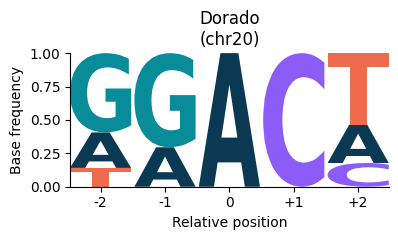

m6ABasecaller
10.0


/tmp/ipykernel_1023285/683216129.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])


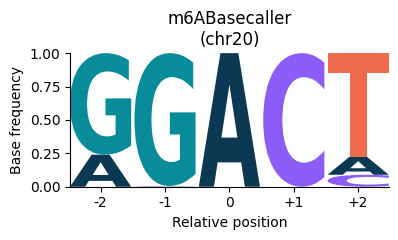

mAFiA
10.0


/tmp/ipykernel_1023285/683216129.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])


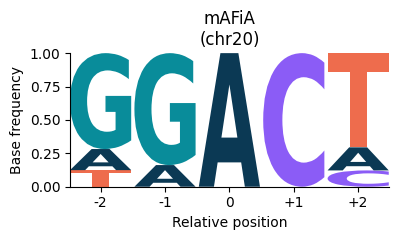

In [23]:
from logomaker import Logo
from logomaker import alignment_to_matrix

for caller in chr20_df["caller"].unique():
    print(caller)
    sequences = chr20_df.loc[chr20_df["caller"] == caller, "sequence_context"].to_list()
    print(chr20_df.loc[chr20_df["caller"] == caller, "modRatio"].min())

    # Create a counts matrix from the aligned sequences
    count_matrix = alignment_to_matrix(sequences, to_type='counts')

    # Normalize to get frequencies
    freq_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0)
    custom_color_dict = {
        'A': '#0B3954',  # Blue
        'C': '#8b5cf6',  # Orange
        'G': '#098C9A',  # Green
        'T': '#EE6C4D'   # Red
    }


    # Plot
    fig, ax = plt.subplots(figsize=(4, 2.5))
    Logo(freq_matrix, ax=ax, color_scheme=custom_color_dict)
    ax.set_xlabel("Relative position")
    ax.set_ylabel("Base frequency")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])
    
    plt.title(caller + "\n(chr20)")
    plt.tight_layout()
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/PAPER_M6A_MOTIF_HOMER_PLOT_" + caller + ".pdf", dpi = 300, transparent = True)
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/PAPER_M6A_MOTIF_HOMER_PLOT_" + caller + ".png", dpi = 300, transparent = True)

    plt.show()

In [34]:
motifs = pd.read_excel("/home/awiercze/NEW_RNA004_PLOTS/13059_2025_3498_MOESM2_ESM.xlsx", sheet_name = "Table S5", names = ["chrom", "start", "end", "mod", "something", "strand"])

In [35]:
df = motifs

In [36]:
df['start'] = df['start'] - 2
df['end'] = df['end'] + 2

# Ensure start doesn't go below 0 (which would be invalid in genome coordinates)
df['start'] = df['start'].apply(lambda x: max(0, x))

# Extract the sequence context for each row in the BED file
df['sequence_context'] = df.apply(lambda row: get_sequence(row['chrom'], row['start'], row['end'], row['strand']), axis=1)
#print(f"Sequence context extracted and saved in {output_file}")

/tmp/ipykernel_1023285/2011038539.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])


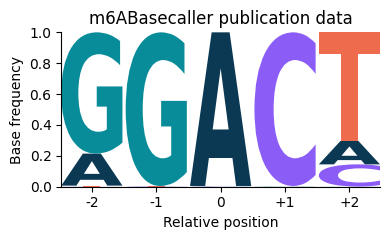

In [38]:
sequences = df["sequence_context"].to_list()

# Create a counts matrix from the aligned sequences
count_matrix = alignment_to_matrix(sequences, to_type='counts')

# Normalize to get frequencies
freq_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0)
custom_color_dict = {
    'A': '#0B3954',  # Blue
    'C': '#8b5cf6',  # Orange
    'G': '#098C9A',  # Green
    'T': '#EE6C4D'   # Red
}


# Plot
fig, ax = plt.subplots(figsize=(4, 2.5))
Logo(freq_matrix, ax=ax, color_scheme=custom_color_dict)
ax.set_xlabel("Relative position")
ax.set_ylabel("Base frequency")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])

plt.title("m6ABasecaller publication data")
plt.tight_layout()

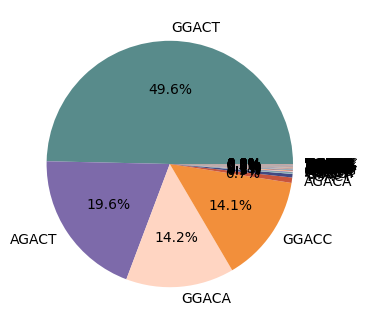

In [39]:
num_motifs = df["sequence_context"].value_counts().reset_index()
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(num_motifs["count"].to_list(), labels=num_motifs["sequence_context"].to_list(), autopct='%1.1f%%', colors = ["#588b8b","#7d6aaa","#ffd5c2","#f28f3b","#c8553d","#434981","#93b7be"] )
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')  
plt.show()


/tmp/ipykernel_1023285/329241242.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])


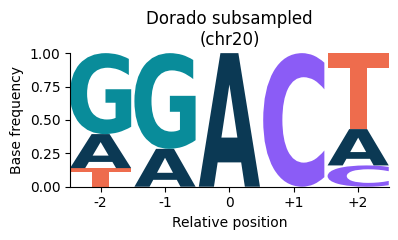

In [24]:
## subsampled
sequences = p_out_subsample["sequence_context"].to_list()

# Create a counts matrix from the aligned sequences
count_matrix = alignment_to_matrix(sequences, to_type='counts')

# Normalize to get frequencies
freq_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0)
custom_color_dict = {
    'A': '#0B3954',  # Blue
    'C': '#8b5cf6',  # Orange
    'G': '#098C9A',  # Green
    'T': '#EE6C4D'   # Red
}


# Plot
fig, ax = plt.subplots(figsize=(4, 2.5))
Logo(freq_matrix, ax=ax, color_scheme=custom_color_dict)
ax.set_xlabel("Relative position")
ax.set_ylabel("Base frequency")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xticklabels(["", "-2", "-1", "0", "+1", "+2"])

plt.title("Dorado subsampled" + "\n(chr20)")
plt.tight_layout()
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/PAPER_M6A_MOTIF_HOMER_PLOT_DORADO_subsampled.pdf", dpi = 300, transparent = True)
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/PAPER_M6A_MOTIF_HOMER_PLOT_DORADO_subsampled.png", dpi = 300, transparent = True)

plt.show()

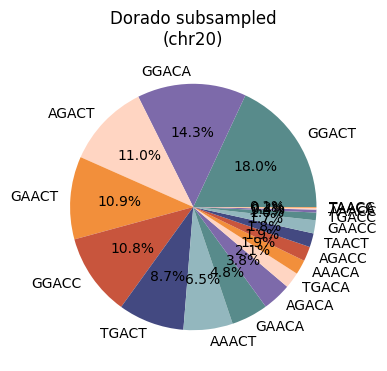

In [25]:
chr20_df["ID"] = chr20_df["sample"].str.replace("RNA00[2|4]_", "", regex = True)

In [26]:
chr20_df = chr20_df[chr20_df["ID"].isin(["blood_IVT_1", "blood_1", "UHRR_1", "HEK293T_A", "HEK293T_B"])]

In [27]:
mAFIa_contexts = chr20_df[chr20_df["caller"] == "mAFiA"]["sequence_context"].drop_duplicates().to_list()
m6ABasecaller_contexts = chr20_df[chr20_df["caller"] == "m6ABasecaller"]["sequence_context"].drop_duplicates().to_list()
RNA002_context = set(mAFIa_contexts) | set(m6ABasecaller_contexts)
chr20_df_sub = chr20_df[chr20_df["sequence_context"].isin(RNA002_context)]

In [28]:
chr20_df_sub = chr20_df_sub[chr20_df_sub["sequence_context"] != "GCACC"]

In [29]:
motif_df = chr20_df.groupby(["caller", "sample"]).nunique().reset_index()

In [108]:
chr20_df_sub["caller"]

5205     Dorado
5216     Dorado
5223     Dorado
5224     Dorado
5225     Dorado
          ...  
36463     mAFiA
36464     mAFiA
36465     mAFiA
36466     mAFiA
36467     mAFiA
Name: caller, Length: 13381, dtype: object

In [195]:
len(m6ABasecaller_contexts)

7

In [152]:
set(mAFIa_contexts).intersection(set(m6ABasecaller_contexts))

{'AGACT', 'GAACT', 'GGACA', 'GGACC', 'GGACT'}

Dorado
m6ABasecaller
mAFiA


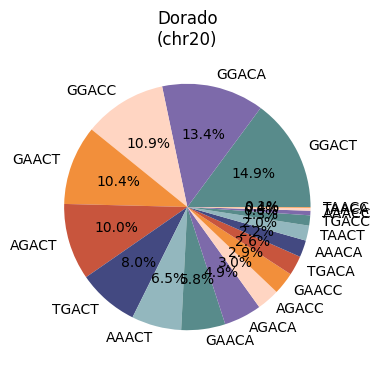

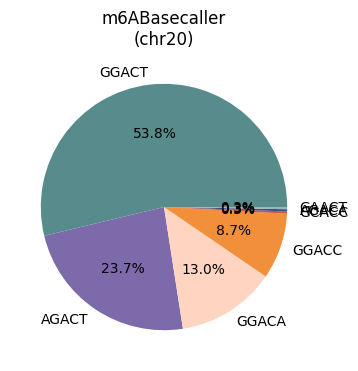

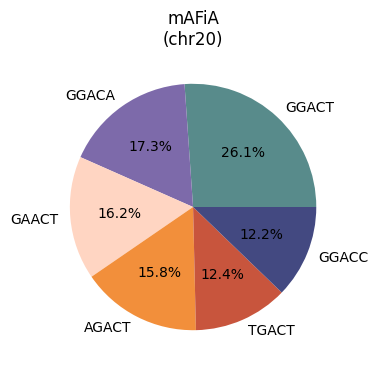

In [30]:
for i in chr20_df["caller"].unique():
       print(i)
       chr20_df_sub_sub = chr20_df[chr20_df["caller"] == i]
       num_motifs = chr20_df_sub_sub["sequence_context"].value_counts().reset_index()
       fig, ax = plt.subplots(figsize=(4,4))
       ax.pie(num_motifs["count"].to_list(), labels=num_motifs["sequence_context"].to_list(), autopct='%1.1f%%', colors = ["#588b8b","#7d6aaa","#ffd5c2","#f28f3b","#c8553d","#434981","#93b7be"] )
       plt.title(i + "\n(chr20)")
       ax.patch.set_edgecolor('black')  
       ax.patch.set_linewidth('1')  
       fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/PAPER_M6A_MOTIF_PIE_PLOT_" + i + ".pdf", dpi = 300, transparent = True)
       fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/PAPER_M6A_MOTIF_PIE_PLOT_" + i + ".png", dpi = 300, transparent = True)

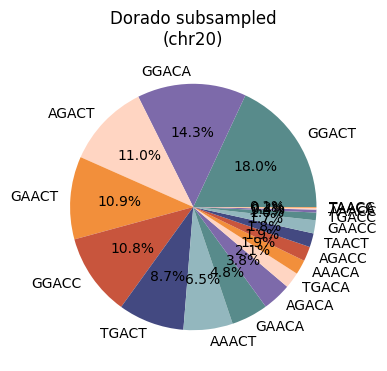

In [31]:
p_out_subsample_sub = p_out_subsample[p_out_subsample["sequence_context"].isin(RNA002_context)]
num_motifs = p_out_subsample["sequence_context"].value_counts().reset_index()
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(num_motifs["count"].to_list(), labels=num_motifs["sequence_context"].to_list(), autopct='%1.1f%%', colors = ["#588b8b","#7d6aaa","#ffd5c2","#f28f3b","#c8553d","#434981","#93b7be"] )
plt.title("Dorado subsampled\n(chr20)")
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')  
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/PAPER_M6A_MOTIF_PIE_PLOT_Dorado_subsampled.pdf", dpi = 300, transparent = True)
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/PAPER_M6A_MOTIF_PIE_PLOT_Dorado_subsampled.png", dpi = 300, transparent = True)

In [154]:
motif_order = ['GGACT','GGACA', 'GGACC', 'GAACT','AGACT', 'TGACT', 'AGACA']

In [190]:
chr20_df_blood_sub = chr20_df_blood[(chr20_df_blood["ID"] == "blood_1") & (chr20_df_blood["sequence_context"].isin(motif_order))]

In [191]:
p_out_mean_per_sample = chr20_df_blood_sub.groupby(["sample", "dataset", "ID","sequence_context"]).agg({'modRatio' : [np.mean, np.median]}).reset_index()

p_out_mean_per_sample = (
    chr20_df_blood_sub.groupby(["sample", "dataset", "ID", "sequence_context"])
         .agg(n_m6A=("modRatio", "count"), frac_mod_mean=("modRatio", "mean"), frac_mod_median=("modRatio", "median"))
         .reset_index()
)

motif_perc_total = chr20_df_blood_sub.groupby("dataset").sequence_context.value_counts() / chr20_df_blood_sub.groupby("dataset").size() * 100
motif_perc_total = motif_perc_total.reset_index(name='percentage')

DRACH_RNA002_4_out = pd.merge(motif_perc_total, p_out_mean_per_sample, on = ["dataset", "sequence_context"], how = "outer")


count_pivot = DRACH_RNA002_4_out.pivot(index="sequence_context", columns="dataset", values="n_m6A")
perc_used = DRACH_RNA002_4_out.pivot(index="sequence_context", columns="dataset", values="percentage")
mean_pivot = DRACH_RNA002_4_out.pivot(index="sequence_context", columns="dataset", values="frac_mod_mean")
median_pivot = DRACH_RNA002_4_out.pivot(index="sequence_context", columns="dataset", values="frac_mod_median")

# Step 3: Rename columns for clarity
mean_pivot.columns = [f"frac_mod_mean.{col}" for col in mean_pivot.columns]
median_pivot.columns = [f"frac_mod_median.{col}" for col in median_pivot.columns]
count_pivot.columns = [f"n_m6A.{col}" for col in count_pivot.columns]
perc_used.columns = [f"DRACH_motif_used.{col}" for col in perc_used.columns]

# Step 4: Merge all three pivot tables
pivot_full = (
    count_pivot
    .join(perc_used, how="outer")
    .join(mean_pivot, how="outer")
    .join(median_pivot, how="outer")
    .reset_index()
)
pivot_full = pivot_full.rename(columns = {"sequence_context": "DRACH_motif"})

In [193]:
pivot_full.to_csv("/home/awiercze/NEW_RNA004_PLOTS/TABLES/RNA002_RNA004_DRACH_MOTIFS.tsv", sep ="\t", index = False)

In [95]:
chr20_df_blood = chr20_df[chr20_df["sample"].str.contains("blood")]
chr20_df_blood["dataset"] =  chr20_df_blood["caller"] + "_" + chr20_df_blood["sample"]
chr20_df_mean_per_sample = (
    chr20_df_blood.groupby(["sample", "ID", "dataset", "caller", "chemistry", "sequence_context"])
         .agg(n_m6A=("modRatio", "count"), frac_mod_mean=("modRatio", "mean"), frac_mod_median=("modRatio", "median"))
         .reset_index()
)


motif_perc_total_002 = chr20_df_blood.groupby("dataset").sequence_context.value_counts() / chr20_df_blood.groupby("dataset").size() * 100
motif_perc_total_002 = motif_perc_total_002.reset_index(name='percentage')
DRACH_RNA002_out = pd.merge(motif_perc_total_002, chr20_df_mean_per_sample, on = ["dataset", "sequence_context"], how = "outer")





count_pivot = DRACH_RNA002_out.pivot(index="sequence_context", columns="dataset", values="n_m6A")
perc_used = DRACH_RNA002_out.pivot(index="sequence_context", columns="dataset", values="percentage")
mean_pivot = DRACH_RNA002_out.pivot(index="sequence_context", columns="dataset", values="frac_mod_mean")
median_pivot = DRACH_RNA002_out.pivot(index="sequence_context", columns="dataset", values="frac_mod_median")

# Step 3: Rename columns for clarity
mean_pivot.columns = [f"frac_mod_mean.{col}" for col in mean_pivot.columns]
median_pivot.columns = [f"frac_mod_median.{col}" for col in median_pivot.columns]
count_pivot.columns = [f"n_m6A.{col}" for col in count_pivot.columns]
perc_used.columns = [f"DRACH_motif_used.{col}" for col in perc_used.columns]

# Step 4: Merge all three pivot tables
pivot_full_002 = (
    count_pivot
    .join(perc_used, how="outer")
    .join(mean_pivot, how="outer")
    .join(median_pivot, how="outer")
    .reset_index()
)
pivot_full_002 = pivot_full_002.rename(columns = {"sequence_context": "DRACH_motif"})
pivot_full_002.to_csv("/home/awiercze/NEW_RNA004_PLOTS/PAPER_RNA002_DRACH_MOTIFS.tsv", sep = "\t", index = False)

/tmp/ipykernel_68382/649296252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chr20_df_blood["dataset"] =  chr20_df_blood["caller"] + "_" + chr20_df_blood["sample"]


### RNA002 LINE PLOT: DRACH percentage modified

In [39]:
chr20_df_sub2 = chr20_df_sub[chr20_df_sub["ID"] == ("blood_1")]

motif_perc_total_002 = chr20_df_sub2.groupby(["sample", "caller"]).sequence_context.value_counts() / chr20_df_sub.groupby(["sample", "caller"]).size() * 100
motif_perc_total_002 = motif_perc_total_002.reset_index(name='percentage')

motif_perc_total_002 = motif_perc_total_002.sort_values(by="percentage", ascending=False)
motif_order_002 = list(motif_perc_total_002.groupby("sequence_context").percentage.mean().sort_values(ascending=False).index)

/tmp/ipykernel_68382/1363930205.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


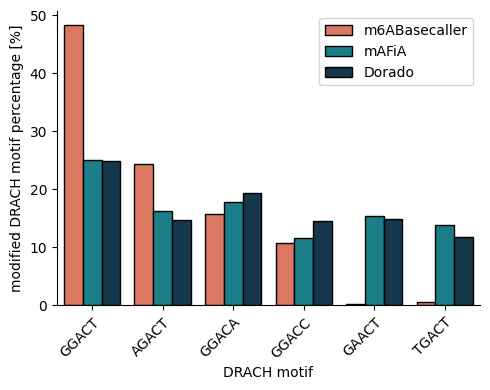

In [41]:
# Set sequence_context as an ordered categorical variable
motif_perc_total_002["sequence_context"] = pd.Categorical(
    motif_perc_total_002["sequence_context"],
    categories=motif_order_002,
    ordered=True
)

# Set sequence_context as an ordered categorical variable
motif_perc_total_002["sample"] = pd.Categorical(
    motif_perc_total_002["sample"],
    categories=motif_perc_total_002["sample"].sort_values().drop_duplicates(),
    ordered=True
)

# Plot
fig = plt.figure(figsize=(5, 4))
ax = sns.barplot(data=motif_perc_total_002, x="sequence_context", y="percentage", hue="caller", palette = colors_input, edgecolor = "black")

# Plot formatting
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylabel("modified DRACH motif percentage [%]")
ax.set_xlabel("DRACH motif")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("")
ax.legend(title="",fontsize=10, title_fontsize=10,loc='upper right')
plt.tight_layout()
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_RNA002_DRACH_motif_usage_all_samples.pdf", bbox_inches='tight', dpi=300)
fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_RNA002_DRACH_motif_usage_all_samples.png", bbox_inches='tight', dpi=300)


blood_IVT_1


/tmp/ipykernel_68382/1947775116.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


HEK293T_B


/tmp/ipykernel_68382/1947775116.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


blood_1


/tmp/ipykernel_68382/1947775116.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


HEK293T_A


/tmp/ipykernel_68382/1947775116.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


UHRR_1


/tmp/ipykernel_68382/1947775116.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


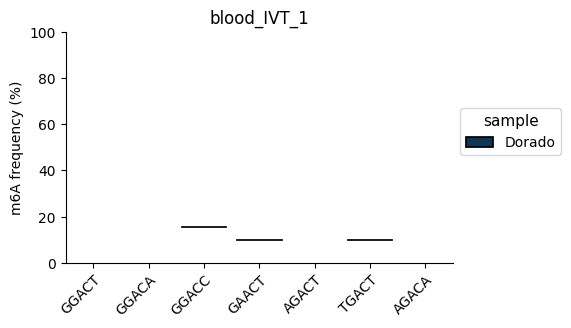

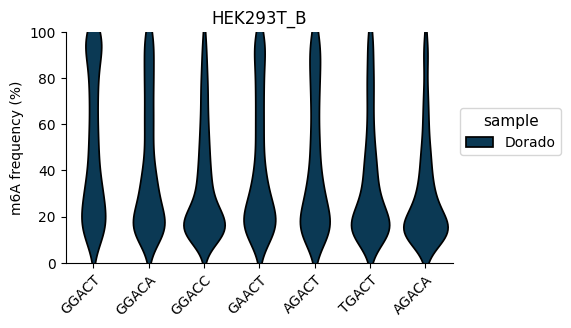

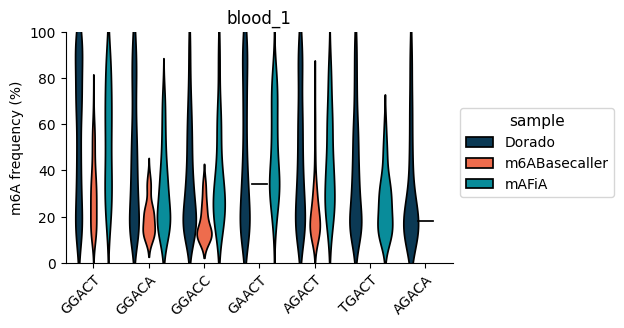

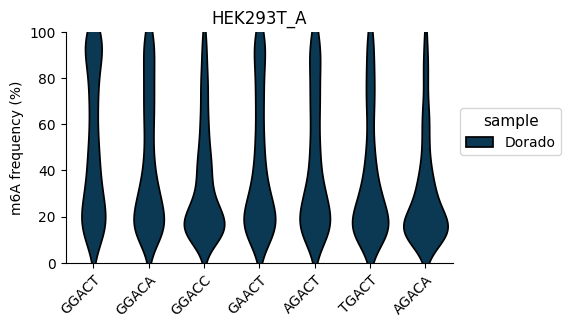

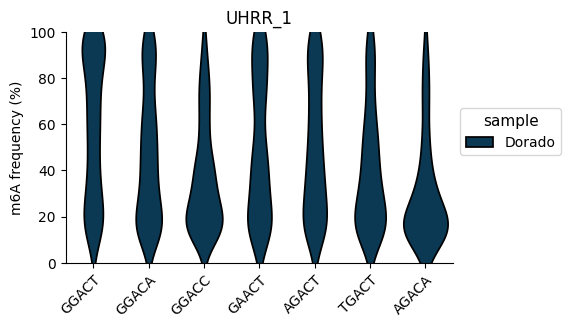

In [155]:
for i in chr20_df["ID"].unique():
    print(i)

    fig, ax = plt.subplots(figsize=(5, 3))
    pin = chr20_df[(chr20_df["ID"] == i) & (chr20_df["sequence_context"].isin(motif_order))]
    sns.violinplot(data = pin, order = motif_order, hue_order =sorted(pin["caller"].unique()),  x="sequence_context", linecolor ="black", y="modRatio",saturation=1,palette=colors_input, inner=None, hue = "caller")
    ax.spines['left'].set_color('black')   # Left axis line
    ax.spines['bottom'].set_color('black') 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_ylim(0 , 100)
    ax.set_title(i)
    ax.legend(title="sample",fontsize=10, title_fontsize=11,
                        bbox_to_anchor=(1, 0.7), loc='upper left')

    ax.set_ylabel("m6A frequency (%)")
    ax.set_xlabel("")
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6a_freq_" + i + "_RNA002.png", bbox_inches='tight', dpi=300)
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_m6a_freq_" + i + "_RNA002.pdf", bbox_inches='tight', dpi=300)

#### BAR PLOT

#### RNA002

blood_IVT_1


/tmp/ipykernel_378904/4097551348.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


HEK293T_B


/tmp/ipykernel_378904/4097551348.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


blood_1


/tmp/ipykernel_378904/4097551348.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


HEK293T_A


/tmp/ipykernel_378904/4097551348.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


UHRR_1


/tmp/ipykernel_378904/4097551348.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")


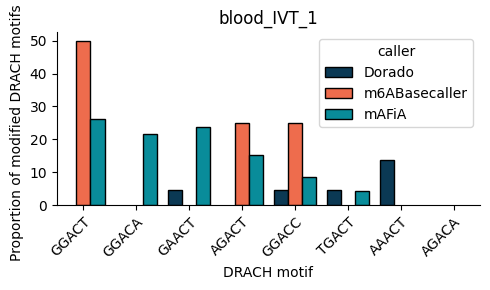

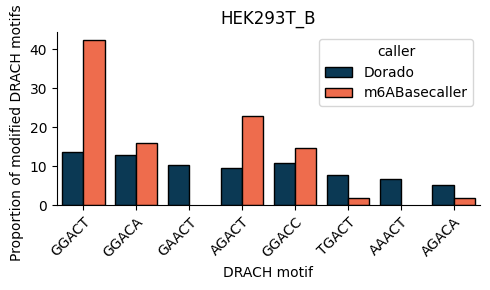

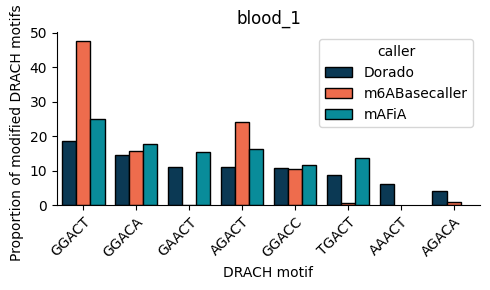

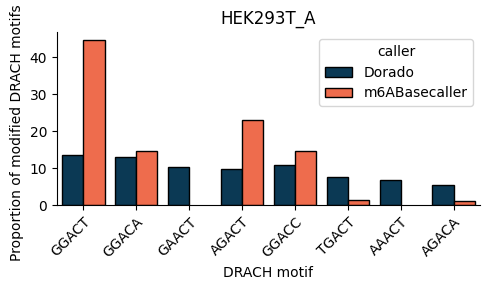

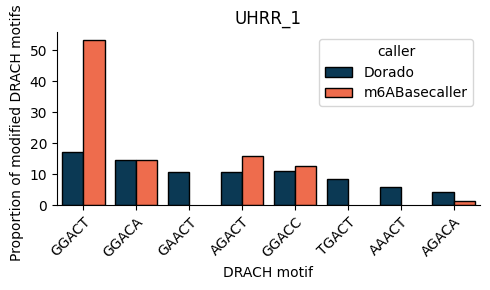

In [ ]:
for i in chr20_df["ID"].unique():
    print(i)

    fig, ax = plt.subplots(figsize=(5, 3))

    pin = chr20_df[(chr20_df["ID"] == i)]
    motif_perc002 = pin[pin["ID"] == i].groupby("caller").sequence_context.value_counts() / pin[pin["ID"] == i].groupby("caller").size() * 100
    motif_perc002 = motif_perc002.reset_index(name='percentage')
    motif_perc002 = motif_perc002[motif_perc002["sequence_context"].isin(motif_order[:8])]

    sns.barplot(data = motif_perc002, x="sequence_context", order =  motif_order[:8], hue_order= sorted(motif_perc002["caller"].unique()), y="percentage", edgecolor = "black", palette=colors_input, saturation=1,hue = "caller")
    ax.spines['left'].set_color('black')   # Left axis line
    ax.spines['bottom'].set_color('black') 
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
    ax.set_ylabel("Proportion of modified DRACH motifs (%)")
    ax.set_xlabel("DRACH motif")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(i)
    plt.tight_layout()
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_proportion_" + i + "_RNA002.png", bbox_inches='tight', dpi=300)
    fig.savefig("/home/awiercze/NEW_RNA004_PLOTS/FIGURE4/PAPER_DRACH_motif_proportion_" + i + "_RNA002.pdf", bbox_inches='tight', dpi=300)